In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..'))) # imports top level

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import display
import scipy
from collections import defaultdict

import random

In [3]:
df = pd.read_excel("input.xlsx", sheet_name="test")

In [4]:
dis = display.Display(df=df)
dis.quick_processing()

The columns with prefix  are not in DataFrame
The columns with prefix None are not in DataFrame


In [5]:
df = dis.df

In [6]:
df

,Name,pmar,"p, %","p, beff",7-6_s,7-5_s,7-4_s,7-3_s,6-6_s,6-5_s,...,average_t,right_center_side_t,left_center_side_t,right_side_t,left_side_t,center_t,qul_t,qur_t,qll_t,qlr_t
0,114,1.08357,7.774369,9.903655,0.648665,0.664725,1.083983,0.954085,0.795975,0.990852,...,282.50,286.0,279.0,286.0,272.0,286.0,279.0,286.0,279.0,286.0
1,114_7-6,1.07174,6.755688,8.605972,1.114553,0.746294,1.187454,1.001877,0.900434,1.090843,...,282.50,286.0,279.0,286.0,272.0,286.0,279.0,286.0,279.0,286.0
2,114_fake11,1.08923,8.368326,10.660287,0.641218,0.642833,1.041846,0.908672,0.806680,0.976815,...,282.50,286.0,279.0,286.0,272.0,286.0,279.0,286.0,279.0,286.0
3,114_fake12,1.10397,9.594128,12.221820,0.676469,1.019903,1.181528,0.942797,0.843354,0.994229,...,282.50,286.0,279.0,286.0,272.0,286.0,279.0,286.0,279.0,286.0
4,114_fake13,1.08883,8.334598,10.617323,0.618502,0.938442,0.643994,0.690662,0.810686,0.933036,...,282.50,286.0,279.0,286.0,272.0,286.0,279.0,286.0,279.0,286.0
5,114_fake14,1.08675,8.158817,10.393397,0.902233,1.009554,0.692320,0.729009,0.853579,0.991107,...,282.50,286.0,279.0,286.0,272.0,286.0,279.0,286.0,279.0,286.0
6,114_fake15,1.08575,8.074067,10.285435,0.928946,1.137616,0.711553,0.746304,0.868008,1.003537,...,282.50,286.0,279.0,286.0,272.0,286.0,279.0,286.0,279.0,286.0
7,114_fake16,1.08019,7.599994,9.681521,1.029842,1.292089,0.795778,1.357336,0.934161,1.087260,...,282.50,286.0,279.0,286.0,272.0,286.0,279.0,286.0,279.0,286.0
8,114_e,1.05418,5.157440,6.569987,0.662633,0.664318,1.114314,0.960230,0.817065,0.989906,...,282.50,286.0,279.0,286.0,272.0,286.0,279.0,286.0,279.0,286.0
9,126_e,1.04559,NaN,NaN,1.021445,1.166776,0.943520,0.888486,0.953183,0.807772,...,284.25,286.0,282.5,286.0,279.0,286.0,279.0,286.0,286.0,286.0


In [7]:
[i for i in df.columns if "average" in i]

['average_s', 'average_l', 'average_p', 'average_b', 'average_t']

In [8]:
df_same_burn = df.iloc[4:]

# 1 Generator of cores
## At the momemt only 8th tube FA can be used to generate new core

In [9]:
p_cols = dis.CORE_PARTS["percentage"]["ALL_CELLS"]
t_cols = dis.CORE_PARTS["fuel_type"]["ALL_CELLS"]

In [10]:
ancestor_0 = df.loc[17, :]

In [11]:
ancestor_0[p_cols] = [float("{:.2f}".format(i)) for i in ancestor_0[p_cols].to_numpy() ]

/tmp/ipykernel_2723/3079140421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ancestor_0[p_cols] = [float("{:.2f}".format(i)) for i in ancestor_0[p_cols].to_numpy() ]
/tmp/ipykernel_2723/3079140421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ancestor_0[p_cols] = [float("{:.2f}".format(i)) for i in ancestor_0[p_cols].to_numpy() ]


In [12]:
p_cols_booleans = ancestor_0.loc[t_cols] == 300
cols_8th = [
    j for i in p_cols_booleans[p_cols_booleans == True].index 
    for j in dis.CORE_PARTS["default"]["ALL_CELLS"]
    if j in i
]

In [13]:
p_cols_8th = [
    j for i in cols_8th
    for j in p_cols
    if i in j
]

In [14]:
p_cols_8th, ancestor_0[p_cols_8th]

(['7-6_p',
  '7-5_p',
  '7-4_p',
  '7-3_p',
  '5-3_p',
  '4-6_p',
  '4-3_p',
  '2-6_p',
  '2-5_p',
  '2-4_p',
  '2-3_p'],
 7-6_p    54.17
 7-5_p    12.02
 7-4_p    15.16
 7-3_p    25.11
 5-3_p    45.07
 4-6_p    48.37
 4-3_p    44.65
 2-6_p    52.98
 2-5_p    17.04
 2-4_p    12.98
 2-3_p    24.22
 Name: 17, dtype: object)

In [15]:
ancestor_0[p_cols_8th].to_list()

[54.17, 12.02, 15.16, 25.11, 45.07, 48.37, 44.65, 52.98, 17.04, 12.98, 24.22]

In [16]:
# some random chromosomes
random.seed(42)
population = []
for _ in range(100):
    population.append(
        np.array(random.sample(population=ancestor_0[p_cols_8th].to_list(), k=len(p_cols_8th)))
    )
population = np.asarray(population)

<Axes: ylabel='Count'>

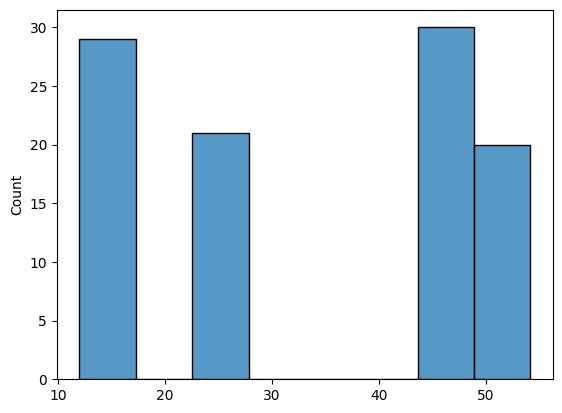

In [17]:
sns.histplot(population[:, 0])

In [18]:
# selection of 8th tubes cols / indexes
p1_8th = np.array(random.sample(population=ancestor_0[p_cols_8th].to_list(), k=len(p_cols_8th)))
p2_8th = np.array(random.sample(population=ancestor_0[p_cols_8th].to_list(), k=len(p_cols_8th)))

In [19]:
child1 = ancestor_0[p_cols].copy()
child2 = ancestor_0[p_cols].copy()

In [20]:
child1[p_cols_8th] = p1_8th
child2[p_cols_8th] = p2_8th

In [21]:
from model import Individual, GA, FITNESS_WEIGHTS_WINDOW, TARGET, Stacking, nonuniformity
from joblib import load, dump

In [22]:
weights = {
    "p_margin": 0.25, # use fuel burnup coef instead of this
    "k_fa_max": 0.25,
    "k_quarter": 0.25, # modify in order to estimate this symmetry more accurate 
    "k_sym": 0.25
}

In [28]:
ga = GA.no_fuel_mask(
    ancestor_0.loc[p_cols].to_numpy(), 
    ancestor_0.loc[t_cols].to_numpy(),
    population_size=500,
    mate_probability=0.6,
    permutation_mutation_probability=0.3,
    mutation_probabilty_fresh_fuel=0.4,
    fintess_weights=weights,
    workers=8
)
indiv = Individual(
    fuel_map=ga.fuel_map,
    dynamic_fuels_gnome_ind=ga.dynamic_fuels_gnome_ind,
)

In [29]:
indiv.fitness_score(indiv, *TARGET)

1.0

In [30]:
ancestor_chromosome = indiv.initialize_chromosome(
    ancestor_0.loc[p_cols].to_numpy(), 
    0
)
ancestor_chromosome

{'id': 0,
 'fuels_gnome': array([54.17, 12.02, 15.16, 25.11, 6.99, 35.13, 58.17, 0.0, 37.47, 45.07,
        48.37, 44.65, 6.9, 53.58, 34.6, 0.0, 52.98, 17.04, 12.98, 24.22],
       dtype=object),
 'core_burnup': 29.2,
 'p_margin': 7.633321798114736,
 'k_fa_max': 1.4362563077838404,
 'k_fa_min': 0.6213472134828165,
 'k_quarter': 0.8256787657297523,
 'k_sym': 0.9152870848204837,
 'fitness_score': 0.8550230287650046}

In [31]:
dis.display(ancestor_chromosome["fuels_gnome"])

,6,5,4,3
7,54.170000,12.020000,15.160000,25.110000
6,6.990000,35.130000,58.170000,0.000000
5,37.470000,nan,nan,45.070000
4,48.370000,nan,nan,44.650000
3,6.900000,53.580000,34.600000,0.000000
2,52.980000,17.040000,12.980000,24.220000


# DO search

In [ ]:
random.seed(42)
trained_population = ga.search(generations=100)
trained_population

start search with populations score: 0.7732349340753392and burnup 29.199999999999992
average populations score 0.7828039565653682 and burnup 29.199999999999992 at the end of 1 generation
average populations score 0.788687505644825 and burnup 29.199999999999992 at the end of 2 generation
average populations score 0.7951816344633075 and burnup 29.199999999999992 at the end of 3 generation
average populations score 0.8018637219852736 and burnup 29.199999999999992 at the end of 4 generation
average populations score 0.8086477535173858 and burnup 29.199999999999992 at the end of 5 generation
average populations score 0.8152026222444426 and burnup 29.199999999999992 at the end of 6 generation
average populations score 0.8196688351074161 and burnup 29.199999999999992 at the end of 7 generation
average populations score 0.8243444668501454 and burnup 29.199999999999992 at the end of 8 generation
average populations score 0.8295221366882547 and burnup 29.199999999999992 at the end of 9 generatio

In [ ]:
dis.display(trained_population[0]["fuels_gnome"])

In [ ]:
dis.display(trained_population[2]["fuels_gnome"])

In [ ]:
dis.display(trained_population[-1]["fuels_gnome"])

In [34]:
dump(
    trained_population,
    "trained_population_123_p_ksym_kquar_100ps.joblib"
)

['trained_population_123_p_ksym_kquar_100ps.joblib']

In [37]:
gen_results = load("trained_population_123_p_ksym_kquar_400ps.joblib")

In [38]:
from main import refueling_pattern

In [39]:
gen_results

[{'id': 280,
  'fuels_gnome': array([25.11, 15.16, 17.04, 54.17, 6.99, 35.13, 58.17, 0.0, 37.47, 44.65,
         48.37, 45.07, 6.9, 53.58, 34.6, 0.0, 24.22, 12.98, 12.02, 52.98],
        dtype=object),
  'core_burnup': 29.2,
  'p_margin': 7.321872316557938,
  'k_fa_max': 1.3935715511816815,
  'k_fa_min': 0.7485859204982837,
  'k_quarter': 0.9455232605074304,
  'k_sym': 0.9094477300883836,
  'fitness_score': 0.9182813224195681},
 {'id': 105,
  'fuels_gnome': array([25.11, 12.02, 15.16, 48.37, 6.99, 35.13, 58.17, 0.0, 37.47, 52.98,
         44.65, 54.17, 6.9, 53.58, 34.6, 0.0, 24.22, 17.04, 12.98, 45.07],
        dtype=object),
  'core_burnup': 29.2,
  'p_margin': 7.1597825180505525,
  'k_fa_max': 1.3921465027263362,
  'k_fa_min': 0.8010579601469462,
  'k_quarter': 0.9523977938336806,
  'k_sym': 0.9190467430878806,
  'fitness_score': 0.918154303579342},
 {'id': 32,
  'fuels_gnome': array([25.11, 15.16, 17.04, 45.07, 6.99, 35.13, 58.17, 0.0, 37.47, 54.17,
         48.37, 52.98, 6.9, 53.58

In [40]:
for res in gen_results:
    res["fuels_gnome"] = refueling_pattern.pairwised_cells_swap(
        ancestor_chromosome["fuels_gnome"],
        res["fuels_gnome"]
    )
    cycles = refueling_pattern.find_pattern(
        ancestor_chromosome["fuels_gnome"],
        res["fuels_gnome"]   
    )
    pattern = refueling_pattern.decode_pattern(ancestor_chromosome["fuels_gnome"], cycles)
    res["permutations"] = pattern

In [41]:
gen_results

[{'id': 280,
  'fuels_gnome': array([25.11, 15.16, 17.04, 54.17, 6.99, 35.13, 58.17, 0.0, 37.47, 45.07,
         48.37, 44.65, 6.9, 53.58, 34.6, 0.0, 24.22, 12.98, 12.02, 52.98],
        dtype=object),
  'core_burnup': 29.2,
  'p_margin': 7.321872316557938,
  'k_fa_max': 1.3935715511816815,
  'k_fa_min': 0.7485859204982837,
  'k_quarter': 0.9455232605074304,
  'k_sym': 0.9094477300883836,
  'fitness_score': 0.9182813224195681,
  'permutations': {0: ['FA 25.11 from cell 7-3 moves to a bucket',
    'FA 54.17 from cell 7-6 moves to a cell 7-3',
    'FA 25.11 from bucket places in a cell 7-6'],
   1: ['FA 15.16 from cell 7-4 moves to a bucket',
    'FA 17.04 from cell 2-5 moves to a cell 7-4',
    'FA 12.98 from cell 2-4 moves to a cell 2-5',
    'FA 12.02 from cell 7-5 moves to a cell 2-4',
    'FA 15.16 from bucket places in a cell 7-5'],
   2: ['FA 52.98 from cell 2-6 moves to a bucket',
    'FA 24.22 from cell 2-3 moves to a cell 2-6',
    'FA 52.98 from bucket places in a cell 2-3'],


In [42]:
def permutationby_sort(dic):
    return dic["permutations"]["total_permutations"]

In [43]:
gen_results.sort(key=permutationby_sort)

In [44]:
gen_results

[{'id': 379,
  'fuels_gnome': array([54.17, 12.02, 15.16, 48.37, 6.99, 35.13, 58.17, 0.0, 37.47, 45.07,
         25.11, 44.65, 6.9, 53.58, 34.6, 0.0, 24.22, 17.04, 12.98, 52.98],
        dtype=object),
  'core_burnup': 29.2,
  'p_margin': 7.493794088536827,
  'k_fa_max': 1.3796658138261613,
  'k_fa_min': 0.6348358874873057,
  'k_quarter': 0.9449316255948886,
  'k_sym': 0.8236818926418121,
  'fitness_score': 0.9039989481246243,
  'permutations': {0: ['FA 25.11 from cell 7-3 moves to a bucket',
    'FA 48.37 from cell 4-6 moves to a cell 7-3',
    'FA 25.11 from bucket places in a cell 4-6'],
   1: ['FA 52.98 from cell 2-6 moves to a bucket',
    'FA 24.22 from cell 2-3 moves to a cell 2-6',
    'FA 52.98 from bucket places in a cell 2-3'],
   'total_permutations': 6}},
 {'id': 95,
  'fuels_gnome': array([44.65, 12.02, 15.16, 52.98, 6.99, 35.13, 58.17, 0.0, 37.47, 45.07,
         25.11, 48.37, 6.9, 53.58, 34.6, 0.0, 24.22, 17.04, 12.98, 54.17],
        dtype=object),
  'core_burnup': 29.

In [46]:
dis.display(np.asarray(gen_results[1]["fuels_gnome"]))


,6,5,4,3
7,44.650000,12.020000,15.160000,52.980000
6,6.990000,35.130000,58.170000,0.000000
5,37.470000,nan,nan,45.070000
4,25.110000,nan,nan,48.370000
3,6.900000,53.580000,34.600000,0.000000
2,24.220000,17.040000,12.980000,54.170000


In [72]:
dis.display(gen_results[0]["fuels_gnome"])

,6,5,4,3
7,51.530000,8.750000,20.380000,10.900000
6,2.570000,31.000000,54.940000,60.790000
5,33.610000,nan,nan,40.840000
4,44.950000,nan,nan,40.520000
3,2.470000,50.410000,30.380000,57.960000
2,50.340000,21.180000,7.670000,12.940000


In [25]:
dis.display(np.asarray(ancestor["fuels_gnome"]))

,6,5,4,3
7,5.380000,19.040000,8.640000,50.060000
6,62.650000,28.680000,53.220000,59.380000
5,31.380000,nan,nan,38.720000
4,6.090000,nan,nan,38.470000
3,62.050000,48.700000,28.240000,56.590000
2,43.400000,10.810000,18.460000,48.940000


In [58]:
gen_results[0]["ga_results"].sort(key=lambda x: x["permutations"]["total permutations"])
print(gen_results[0]["ga_results"][0])
dis.display(gen_results[0]["ga_results"][0]["fuels_gnome"])

{'id': 28, 'fuels_gnome': array([41.0, 9.54, 49.68, 13.23, 33.2, 58.42, 26.37, 32.6, 0.0, 41.01,
       9.58, 40.28, 32.47, 23.94, 57.97, 31.17, 41.41, 47.56, 13.07, 0.0],
      dtype=object), 'core_burnup': 30.1, 'p_margin': 7.249569050566053, 'k_fa_max': 1.3047979912604037, 'k_fa_min': 0.7614664929478533, 'k_left_right': 0.9243626678929541, 'k_sym': 0.977434045614957, 'fitness_score': 0.9287751093609721, 'permutations': {0: ['FA 49.68 from cell 7-3 moves to a bucket', 'FA 13.23 from cell 7-6 moves to a cell 7-3', 'FA 41.0 from cell 5-3 moves to a cell 7-6', 'FA 41.01 from cell 2-5 moves to a cell 5-3', 'FA 47.56 from cell 2-3 moves to a cell 2-5', 'FA 0.0 from cell 4-6 moves to a cell 2-3', 'FA 9.58 from cell 7-5 moves to a cell 4-6', 'FA 9.54 from cell 2-4 moves to a cell 7-5', 'FA 13.07 from cell 2-6 moves to a cell 2-4', 'FA 41.41 from cell 7-4 moves to a cell 2-6', 'FA 49.68 from bucket places in a cell 7-4'], 'total permutations': 11}}


,6,5,4,3
7,41.000000,9.540000,49.680000,13.230000
6,33.200000,58.420000,26.370000,32.600000
5,0.000000,nan,nan,41.010000
4,9.580000,nan,nan,40.280000
3,32.470000,23.940000,57.970000,31.170000
2,41.410000,47.560000,13.070000,0.000000


In [53]:
gen_results[1]["ga_results"].sort(key=lambda x: x["permutations"]["total permutations"])
gen_results[1]

{'p_margin': 0.25,
 'k_fa_max': 0.1,
 'k_left_right': 0.13,
 'k_sym': 0.52,
 'ga_results': [{'id': 25,
   'fuels_gnome': array([13.23, 40.28, 49.68, 9.58, 33.2, 58.42, 26.37, 32.6, 0.0, 41.0,
          9.54, 41.41, 32.47, 23.94, 57.97, 31.17, 13.07, 47.56, 41.01, 0.0],
         dtype=object),
   'core_burnup': 30.1,
   'p_margin': 6.912827564537952,
   'k_fa_max': 1.3183453460798247,
   'k_fa_min': 0.7673391666437683,
   'k_left_right': 0.978710476484539,
   'k_sym': 0.97767055824405,
   'fitness_score': 0.9338377627545102,
   'permutations': {0: ['FA 41.41 from cell 7-4 moves to a bucket',
     'FA 49.68 from cell 7-3 moves to a cell 7-4',
     'FA 9.58 from cell 7-5 moves to a cell 7-3',
     'FA 40.28 from cell 4-3 moves to a cell 7-5',
     'FA 41.41 from bucket places in a cell 4-3'],
    1: ['FA 0.0 from cell 4-6 moves to a bucket',
     'FA 9.54 from cell 2-4 moves to a cell 4-6',
     'FA 41.01 from cell 2-5 moves to a cell 2-4',
     'FA 47.56 from cell 2-3 moves to a cell 2-5

## Generate population

In [28]:
population = ga.make_population()

In [29]:
population

[{'id': 26,
  'fuels_gnome': array([42.8, 14.28, 57.33, 16.42, 38.23, 37.67, 11.55, 22.21, 51.15,
         56.55, 32.79, 40.88, 35.61, 10.12, 39.14, 20.31, 37.64, 0.0, 39.41,
         49.02], dtype=object),
  'core_burnup': 32.7,
  'p_margin': 6.191928317427417,
  'k_fa_max': 1.3449936547801935,
  'k_fa_min': 0.7435540293522419,
  'k_left_right': 0.9235634382773774,
  'fitness_score': 0.8261530814179161},
 {'id': 38,
  'fuels_gnome': array([0.0, 57.33, 32.79, 40.88, 38.23, 37.67, 11.55, 22.21, 51.15, 42.8,
         16.42, 39.41, 35.61, 10.12, 39.14, 20.31, 37.64, 14.28, 56.55,
         49.02], dtype=object),
  'core_burnup': 32.7,
  'p_margin': 5.942893050526707,
  'k_fa_max': 1.3514367481776726,
  'k_fa_min': 0.6850791257436335,
  'k_left_right': 0.9402008260157281,
  'fitness_score': 0.8186027839415847},
 {'id': 2,
  'fuels_gnome': array([57.33, 42.8, 16.42, 56.55, 38.23, 37.67, 11.55, 22.21, 51.15,
         40.88, 14.28, 49.02, 35.61, 10.12, 39.14, 20.31, 37.64, 39.41, 0.0,
        

In [30]:
dis.display(ancestor_chromosome["fuels_gnome"])

,6,5,4,3
7,49.020000,57.330000,14.280000,39.410000
6,38.230000,37.670000,11.550000,22.210000
5,51.150000,nan,nan,32.790000
4,40.880000,nan,nan,0.000000
3,35.610000,10.120000,39.140000,20.310000
2,37.640000,16.420000,56.550000,42.800000


In [31]:
dis.display(population[0]["fuels_gnome"])

,6,5,4,3
7,42.800000,14.280000,57.330000,16.420000
6,38.230000,37.670000,11.550000,22.210000
5,51.150000,nan,nan,56.550000
4,32.790000,nan,nan,40.880000
3,35.610000,10.120000,39.140000,20.310000
2,37.640000,0.000000,39.410000,49.020000


In [32]:
dis.display(population[20]["fuels_gnome"])

,6,5,4,3
7,40.880000,57.330000,49.020000,56.550000
6,38.230000,37.670000,11.550000,22.210000
5,51.150000,nan,nan,0.000000
4,32.790000,nan,nan,16.420000
3,35.610000,10.120000,39.140000,20.310000
2,37.640000,14.280000,39.410000,42.800000


In [33]:
dis.display(population[-1]["fuels_gnome"])

,6,5,4,3
7,57.330000,56.550000,39.410000,16.420000
6,38.230000,37.670000,11.550000,22.210000
5,51.150000,nan,nan,0.000000
4,40.880000,nan,nan,14.280000
3,35.610000,10.120000,39.140000,20.310000
2,37.640000,49.020000,42.800000,32.790000


## Do matting

In [34]:
offspring = ga.mate(
    population[10],
    population[11]
)
print(offspring)
dis.display(offspring["fuels_gnome"])

{'id': 0, 'fuels_gnome': array([16.42, 0.0, 56.55, 40.88, 38.23, 37.67, 11.55, 22.21, 51.15, 49.02,
       39.41, 32.79, 35.61, 10.12, 39.14, 20.31, 37.64, 42.8, 14.28,
       57.33], dtype=object), 'core_burnup': 32.7, 'p_margin': 5.580475777875024, 'k_fa_max': 1.388782624743694, 'k_fa_min': 0.6935795468935506, 'k_left_right': 0.899398013704116, 'fitness_score': 0.7810274174926545}


,6,5,4,3
7,16.420000,0.000000,56.550000,40.880000
6,38.230000,37.670000,11.550000,22.210000
5,51.150000,nan,nan,49.020000
4,39.410000,nan,nan,32.790000
3,35.610000,10.120000,39.140000,20.310000
2,37.640000,42.800000,14.280000,57.330000


In [35]:
family = [
    offspring, 
    population[10].copy(),
    population[11].copy()
]
ga.mate_tournament_selection(family)

[{'id': 39,
  'fuels_gnome': array([39.41, 0.0, 49.02, 16.42, 38.23, 37.67, 11.55, 22.21, 51.15, 57.33,
         14.28, 40.88, 35.61, 10.12, 39.14, 20.31, 37.64, 56.55, 42.8,
         32.79], dtype=object),
  'core_burnup': 32.7,
  'p_margin': 5.673424248310043,
  'k_fa_max': 1.4107161813552216,
  'k_fa_min': 0.6400830554352792,
  'k_left_right': 0.8963078518615296,
  'fitness_score': 0.7816825103783311},
 {'id': 25,
  'fuels_gnome': array([16.42, 0.0, 56.55, 40.88, 38.23, 37.67, 11.55, 22.21, 51.15, 49.02,
         39.41, 32.79, 35.61, 10.12, 39.14, 20.31, 37.64, 42.8, 14.28,
         57.33], dtype=object),
  'core_burnup': 32.7,
  'p_margin': 5.580475777875024,
  'k_fa_max': 1.388782624743694,
  'k_fa_min': 0.6935795468935506,
  'k_left_right': 0.899398013704116,
  'fitness_score': 0.7810274174926545}]

## Do mutation

In [37]:
mutated_chromosome = ga.permutation_mutation(
    population[-1].copy()
)
mutated_chromosome, population[-1]

({'id': 35,
  'fuels_gnome': array([57.33, 14.28, 39.41, 16.42, 38.23, 37.67, 11.55, 22.21, 51.15, 0.0,
         40.88, 42.8, 35.61, 10.12, 39.14, 20.31, 37.64, 49.02, 56.55,
         32.79], dtype=object),
  'core_burnup': 32.7,
  'p_margin': 6.130688528473118,
  'k_fa_max': 1.7242877062109025,
  'k_fa_min': 0.6098921932908892,
  'k_left_right': 0.7407049253964052,
  'fitness_score': 0.7165680515142547},
 {'id': 35,
  'fuels_gnome': array([57.33, 56.55, 39.41, 16.42, 38.23, 37.67, 11.55, 22.21, 51.15, 0.0,
         40.88, 14.28, 35.61, 10.12, 39.14, 20.31, 37.64, 49.02, 42.8,
         32.79], dtype=object),
  'core_burnup': 32.7,
  'p_margin': 6.173923248554377,
  'k_fa_max': 1.72690529929065,
  'k_fa_min': 0.5533532720047417,
  'k_left_right': 0.658635276127472,
  'fitness_score': 0.6897768518527971})

#### Fresh Fuel Mutation probability rate

<Axes: >

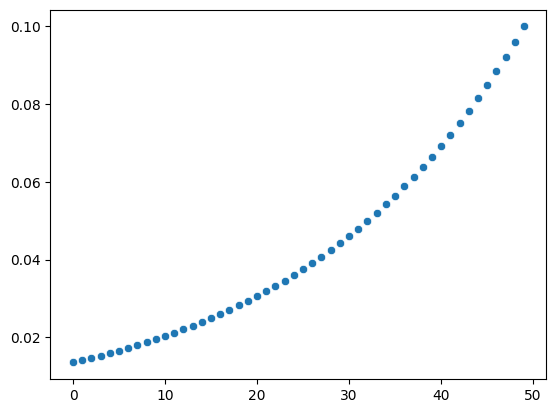

In [38]:
x_raw = np.linspace(28,40,50)
x = ( x_raw - x_raw.min() ) / ( x_raw.max() - x_raw.min() )
sns.scatterplot(np.exp(2*x) / np.exp(2*1) * 0.1)

#### Mutation probability rate

<Axes: >

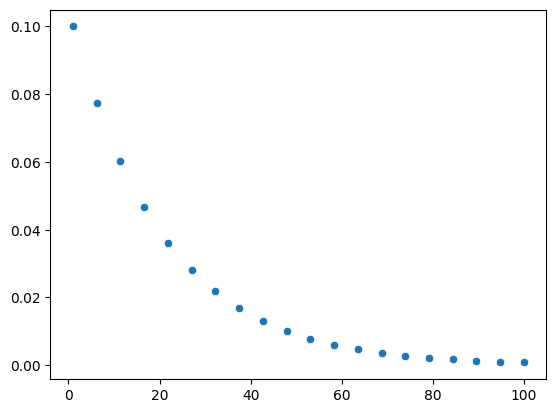

In [41]:
x = np.linspace(1,100,20)
sns.scatterplot(x=x, y=( (1 / np.power(1.05, x)) / ( 1 / np.power(1.05, 1)) ) * 0.1 )

In [88]:
np.asarray(list(map(lambda x: x["k_fa_max"], population))).mean()

1.4829589815728434

#### K burnup symmetry

In [35]:
x = np.linspace(0,70, 100)

<Axes: >

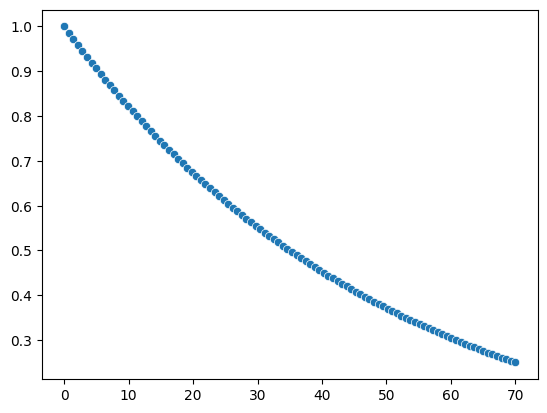

In [39]:
sns.scatterplot(x=x, y=np.power(1.02, 0) / np.power(1.02, x))

<Axes: >

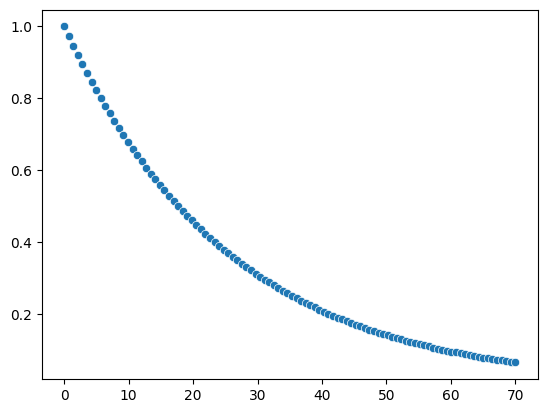

In [42]:
sns.scatterplot(x=x, y=np.power(1.04, 0) / np.power(1.04, x))

<Axes: >

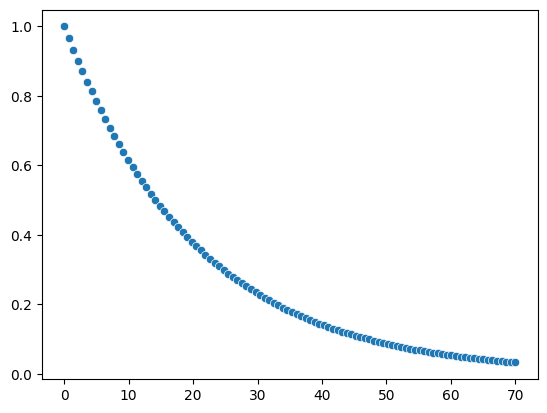

In [43]:
sns.scatterplot(x=x, y=np.power(1.05, 0) / np.power(1.05, x))

#### K sym / k quarter

In [29]:
x = np.linspace(0, 1, 50)

<Axes: >

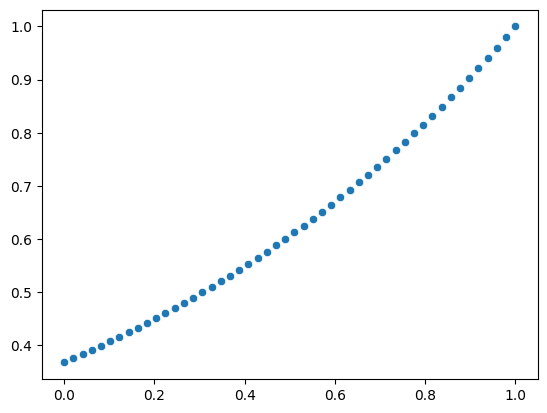

In [31]:
sns.scatterplot(x=x, y=np.exp((x - 1)) ) # / np.exp(1))

#### K fa max
#### rapid decreasing after limit exceeded

In [222]:
x_lim = 1.2
x = np.linspace(1.2, 2, 50)

In [223]:
y = x.copy()
# pos, val
stage = [None, None]
for i in range(len(x)):
    if x[i] <= 1.5:
        y[i] = 1 / ( x[i]/x_lim )
        continue
    elif stage[0] is None:
        print("assigning")
        stage[0] = x[i-1]
        stage[1] = y[i-1]
    y[i] = stage[1] * np.exp(-5* x[i] ) / np.exp ( -5* stage[0] )


assigning


<Axes: >

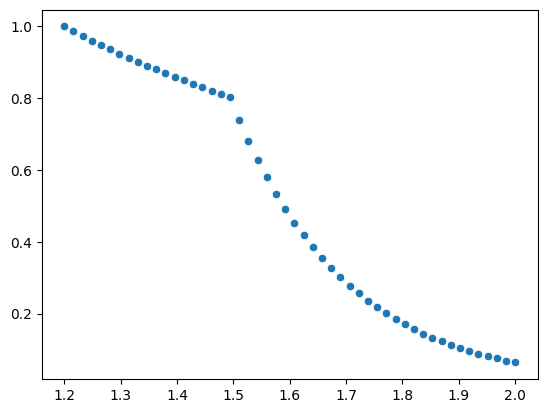

In [224]:
sns.scatterplot(x=x, y=y)

<Axes: >

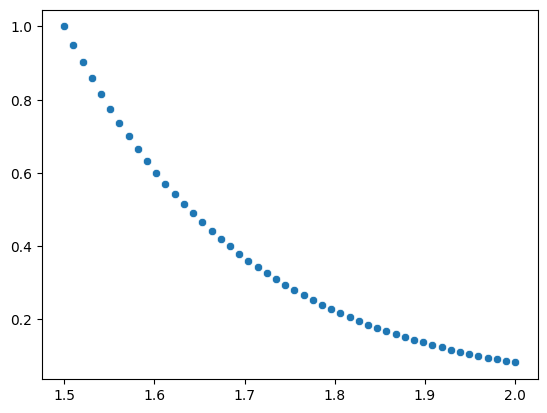

In [227]:
x_lim = 1.5
x = np.linspace(1.5, 2, 50)

sns.scatterplot(x=x, y=np.exp(-5*x) / np.exp(-5*x_lim))